In [5]:
import os
import json
import time
import pandas as pd
from src.vycisti import vycisti
pd.set_option('display.max_columns', None)
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
df = vycisti(pd.read_json(os.path.join("data", "filmy.json")), opravy)
pisne = vycisti(pd.read_json(os.path.join("data", "pisne.json")), opravy)

2023/05/28 23:30:27 z 4555 řádků odstraněno 125. Aktuální dataframe má 4430 řádků.
2023/05/28 23:30:28 z 10169 řádků odstraněno 251. Aktuální dataframe má 9918 řádků.


In [6]:
df = df[["Film","Copyright","Režie","Žánr"]]

In [7]:
pisne = pisne.merge(df, on="Film")

In [8]:
pisne

,Film,Píseň,Hudba k písni,Text písně,Zpívá,Copyright,Režie,Žánr
0,Občanský průkaz (103354),Most of the Time,Bob Dylan (48949),None,Bob Dylan (48949),2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"
1,Občanský průkaz (103354),Obut a oblečen,Petr Ostrouchov (5833),None,"[Matouš Vrba (76615), Petr Ostrouchov (5833)]",2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"
2,Občanský průkaz (103354),Paranoid,"[Tony Iommi (5649), Bill Ward (76634), Ozzy Os...","[Tony Iommi (5649), Bill Ward (76634), Ozzy Os...",Black Sabbath (76649),2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"
3,Občanský průkaz (103354),Ballroom Blitz,"[Michael Chapman (76637), Nicholas Chinn (76638)]","[Michael Chapman (76637), Nicholas Chinn (76638)]",Sweet (76650),2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"
4,Občanský průkaz (103354),Dobré ráno blues,None,Vladimír Ptaszek (76643),"[Ľuboš Beňa (76632), Matěj Ptaszek (30591)]",2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"
...,...,...,...,...,...,...,...,...
9903,Cesta pustým lesem (9732),Taková alej stromů,None,None,Václav Koubek (7600),1997,[Ivan Vojnár (4787)],balada
9904,Cesta pustým lesem (9732),Cserebogár sárga cserebogár,None,None,None,1997,[Ivan Vojnár (4787)],balada
9905,Knoflíkáři (9793),The End,None,None,None,1997,[Petr Zelenka (4806)],"[komedie, povídkový]"
9906,Knoflíkáři (9793),That Is a Question,None,None,None,1997,[Petr Zelenka (4806)],"[komedie, povídkový]"


In [9]:
pisne[pisne["Film"] == "Občanský průkaz (103354)"]

,Film,Píseň,Hudba k písni,Text písně,Zpívá,Copyright,Režie,Žánr
0,Občanský průkaz (103354),Most of the Time,Bob Dylan (48949),None,Bob Dylan (48949),2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"
1,Občanský průkaz (103354),Obut a oblečen,Petr Ostrouchov (5833),None,"[Matouš Vrba (76615), Petr Ostrouchov (5833)]",2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"
2,Občanský průkaz (103354),Paranoid,"[Tony Iommi (5649), Bill Ward (76634), Ozzy Os...","[Tony Iommi (5649), Bill Ward (76634), Ozzy Os...",Black Sabbath (76649),2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"
3,Občanský průkaz (103354),Ballroom Blitz,"[Michael Chapman (76637), Nicholas Chinn (76638)]","[Michael Chapman (76637), Nicholas Chinn (76638)]",Sweet (76650),2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"
4,Občanský průkaz (103354),Dobré ráno blues,None,Vladimír Ptaszek (76643),"[Ľuboš Beňa (76632), Matěj Ptaszek (30591)]",2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"
5,Občanský průkaz (103354),Nemakej,None,Ondřej Trojan (1348),"[Ľuboš Beňa (76632), Matěj Ptaszek (30591)]",2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"
6,Občanský průkaz (103354),Píseň kozi,Petr Ostrouchov (5833),Aleš Kovanda (76644),"[Libor Kovář (76614), Jakub Šárka (76616)]",2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"
7,Občanský průkaz (103354),Eliášův oheň,Milan Hlavsa (166),František Pánek (76645),The Plastic People of the Universe (26998),2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"
8,Občanský průkaz (103354),Lásko,Karel Kryl (25044),Karel Kryl (25044),Karel Kryl (25044),2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"
9,Občanský průkaz (103354),Sun Is So Bright,"[Radim Hladík (8721), Vladimír Mišík (25010), ...",Karel Kozel (76646),None,2010,[Ondřej Trojan (1348)],"[historický, komedie, hořká komedie]"


In [10]:
pisne = pisne.explode("Hudba k písni").explode("Text písně").explode("Zpívá").explode("Žánr").explode("Režie")

In [11]:
pisne.groupby("Zpívá")["Film"].nunique().nlargest(50)

Zpívá
Karel Gott (3861)                        81
Waldemar Matuška (1787)                  48
Setleři (129620)                         38
Eva Pilarová (10373)                     34
Helena Vondráčková (12227)               31
Jiří Suchý (2270)                        31
Václav Neckář (8835)                     29
Oldřich Kovář (104486)                   26
Jiří Korn (8831)                         25
R. A. Dvorský (17596)                    25
Oldřich Nový (12009)                     24
Vlasta Burian (11992)                    24
Hana Zagorová (23365)                    22
Michal David (7475)                      22
Fanda Mrázek (128457)                    21
Hana Vítová (126418)                     21
Hana Hegerová (13526)                    20
Josef Zíma (2821)                        20
Jan Werich (1287)                        19
Naďa Urbánková (25682)                   19
Yvetta Simonová (22436)                  19
Ladislav Pešek (53326)                   18
Ljuba Hermanová (4952)    

In [12]:
pisne.groupby("Zpívá")["Režie"].nunique().nlargest()

Zpívá
Karel Gott (3861)             67
Waldemar Matuška (1787)       41
Jiří Suchý (2270)             36
Eva Pilarová (10373)          30
Helena Vondráčková (12227)    26
Name: Režie, dtype: int64

In [13]:
pisne[pisne["Zpívá"] == "Setleři (129620)"]                          

,Film,Píseň,Hudba k písni,Text písně,Zpívá,Copyright,Režie,Žánr
1510,Sňatková kancelář (395570),Tvé oči to poznaly,Eman Fiala (64088),Jaroslav Mottl (55549),Setleři (129620),1932,Svatopluk Innemann (33860),komedie
1511,Sňatková kancelář (395570),Vítr tiše zpíval,Eman Fiala (64088),Jaroslav Mottl (55549),Setleři (129620),1932,Svatopluk Innemann (33860),komedie
1513,Sňatková kancelář (395570),"Hurá, už máme sníh",Eman Fiala (64088),Jaroslav Mottl (55549),Setleři (129620),1932,Svatopluk Innemann (33860),komedie
1514,Sňatková kancelář (395570),Už mou milou do kostela vedou,None,None,Setleři (129620),1932,Svatopluk Innemann (33860),komedie
1519,Malostranští mušketýři (395572),Život je bloudění,Eman Fiala (64088),Jaroslav Mottl (55549),Setleři (129620),1932,Svatopluk Innemann (33860),komedie
...,...,...,...,...,...,...,...,...
6582,Stvoření světa (398776),Když má naspěch jako vítr,Jan Rychlík (33383),Adolf Hoffmeister (19078),Setleři (129620),1957,Eduard Hofman (78970),komedie
6582,Stvoření světa (398776),Když má naspěch jako vítr,Jan Rychlík (33383),Adolf Hoffmeister (19078),Setleři (129620),1957,Eduard Hofman (78970),báje
6583,Stvoření světa (398776),"Adámku náš, na co čekáš",Jan Rychlík (33383),Adolf Hoffmeister (19078),Setleři (129620),1957,Eduard Hofman (78970),biblický
6583,Stvoření světa (398776),"Adámku náš, na co čekáš",Jan Rychlík (33383),Adolf Hoffmeister (19078),Setleři (129620),1957,Eduard Hofman (78970),komedie


In [14]:
pisne.groupby("Text písně")["Film"].nunique().nlargest(20)

Text písně
Jiří Suchý (2270)            97
Zdeněk Borovec (2828)        92
Jaroslav Mottl (55549)       86
Zdeněk Rytíř (16047)         55
Jiří Štaidl (2827)           53
Jan Werich (1287)            49
Pavel Kopta (42048)          46
Jiří Voskovec (1781)         45
Karel Hašler (12006)         45
Karel Melíšek (127503)       38
Ivo Fischer (2835)           37
K. M. Walló (51350)          34
František Kudrna (129582)    31
Eduard Krečmar (22460)       30
Josef Kajetán Tyl (83349)    26
Karel Tobis (3635)           26
Josef Gruss (21885)          24
Pavel Žák (10952)            23
Vratislav Blažek (126137)    22
Zdeněk Svěrák (1892)         22
Name: Film, dtype: int64

In [15]:
pisne.groupby("Hudba k písni")["Film"].nunique().nlargest(20)

Hudba k písni
Jiří Šlitr (2822)           87
Jaroslav Ježek (1780)       58
Josef Stelibský (31111)     58
Karel Hašler (12006)        49
Josef Dobeš (79567)         48
Karel Svoboda (2860)        44
Jára Beneš (53046)          43
František Škroup (24668)    37
Jaromír Vejvoda (11729)     36
Karel Vacek (5766)          35
Petr Hapka (193)            35
Ladislav Štaidl (8125)      34
František Kmoch (2833)      32
Karel Mareš (2820)          30
Vlastimil Hála (69987)      29
Bedřich Smetana (2269)      26
Jiří Srnka (64086)          26
Eman Fiala (64088)          24
Jaromír Vomáčka (22456)     23
Jaroslav Uhlíř (9261)       23
Name: Film, dtype: int64

In [16]:
pisne.groupby(["Režie","Zpívá"])["Film"].nunique().nlargest(10)

Režie                       Zpívá                            
Martin Frič (20324)         Vlasta Burian (11992)                10
Karel Lamač (37847)         Vlasta Burian (11992)                 7
Martin Frič (20324)         Hugo Haas (37289)                     7
Vladimír Slavínský (31967)  Setleři (129620)                      6
Jaroslav Soukup (1171)      Michal David (7475)                   5
Martin Frič (20324)         R. A. Dvorský (17596)                 5
Miroslav Cikán (31969)      Hana Vítová (126418)                  5
                            Jindřich Plachta (5829)               5
Vladimír Slavínský (31967)  František Krištof-Veselý (129585)     5
Zdeněk Podskalský (4749)    Waldemar Matuška (1787)               5
Name: Film, dtype: int64

In [17]:
pisne.groupby("Píseň")["Film"].nunique().nlargest(10)

Píseň
Kde domov můj                    34
Škoda lásky                      28
Zelení hájové                    22
Internacionála                   19
Ktož jsú boží bojovníci          19
Život je jen náhoda              19
Už mou milou do kostela vedou    17
Šly panenky silnicí              16
Jen pro ten dnešní den           15
Kolíne, Kolíne                   15
Name: Film, dtype: int64

In [18]:
pisne.groupby("Text písně")["Píseň"].nunique().nlargest(10)

Text písně
Jaroslav Mottl (55549)       179
Jiří Suchý (2270)            150
Zdeněk Borovec (2828)        112
Jiří Štaidl (2827)            80
Pavel Kopta (42048)           74
Karel Melíšek (127503)        71
Karel Hašler (12006)          70
Vratislav Blažek (126137)     65
Zdeněk Rytíř (16047)          64
Karel Tobis (3635)            55
Name: Píseň, dtype: int64

In [19]:
pisne.groupby("Zpívá")["Píseň"].nunique().nlargest(10)

Zpívá
Karel Gott (3861)             131
Setleři (129620)               81
Jiří Suchý (2270)              75
Waldemar Matuška (1787)        73
Vlasta Burian (11992)          45
Helena Vondráčková (12227)     42
Michal David (7475)            42
Miro Žbirka (9311)             40
Eva Pilarová (10373)           38
Václav Neckář (8835)           37
Name: Píseň, dtype: int64

In [20]:
pisne[pisne["Zpívá"] == "Karel Gott (3861)"].groupby("Píseň")["Film"].nunique().nlargest(20)

Píseň
Kávu si osladím                  6
Den je krásný                    4
Kdepak ty ptáčku hnízdo máš      4
Zvonky štěstí                    4
Beatles                          3
Bum, bum, bum                    3
C'est la vie                     3
Jdi za štěstím                   3
Lady Carneval                    3
Mít talent, co měl Paganini      3
Oči sněhem zaváté                3
Prostři pro dva stůl             3
Sou fár tu jú aj mej /So far/    3
Kde domov můj                    2
Kufr iluzí                       2
Láska bláznivá                   2
Má mě ráda                       2
Proč ptáci zpívají               2
Pábitelé                         2
Přijela pouť                     2
Name: Film, dtype: int64

In [21]:
pisne.groupby(["Píseň","Zpívá"])["Film"].nunique().nlargest(10)

Píseň                   Zpívá                         
Motýl                   Jana Malknechtová (30767)         7
Ach, ta láska nebeská   Eva Pilarová (10373)              6
                        Waldemar Matuška (1787)           6
Jen pro ten dnešní den  Oldřich Nový (12009)              6
Kávu si osladím         Karel Gott (3861)                 6
Krajina posedlá tmou    Jiří Suchý (2270)                 5
Noční motýl             Míla Spazierová-Hezká (126963)    5
Pramínek vlasů          Jiří Suchý (2270)                 5
Decibely lásky          Michal David (7475)               4
Den je krásný           Karel Gott (3861)                 4
Name: Film, dtype: int64

<AxesSubplot:xlabel='Copyright'>

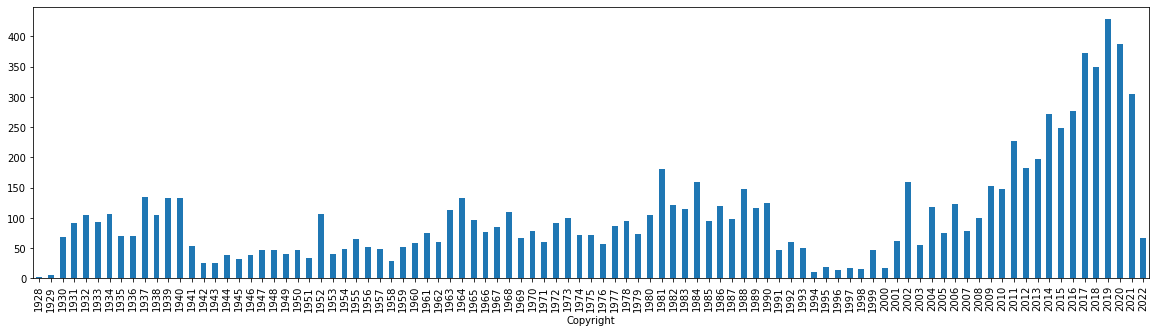

In [22]:
pisne.groupby("Copyright")["Píseň"].nunique().plot.bar(figsize=(20,5))

In [23]:
pisne.groupby("Film")["Píseň"].nunique().nlargest(20)

Film
Attila (402032)                                                 58
Motorband: Restart (401733)                                     51
EM a ON (184193)                                                49
Karel (402130)                                                  43
Vyšehrad Fylm (402232)                                          43
Meky (402064)                                                   39
Karel Svoboda – Šťastná léta (402028)                           37
Nechte zpívat Mišíka (401177)                                   37
Mstitel (402140)                                                33
Brak (12851)                                                    31
Jiří Suchý – Lehce s životem se prát (401980)                   31
King Skate (401786)                                             31
Barrandovské nokturno aneb Jak film tančil a zpíval (400328)    30
Lucie: Příběh jedný kapely (400894)                             30
Román pro muže (160436)                                  